<a href="https://colab.research.google.com/github/Svk396/Appliances_Energy_prediction_ML_Model_Regression/blob/main/Appliances_Energy_Prediction_Analysis_ML_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -Appliance Energy Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -** Sabitendhu Mahapratap
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

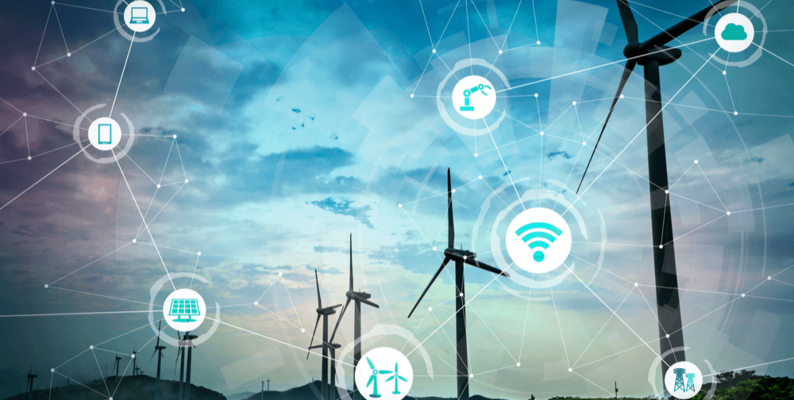

# **Project Summary -**

Energy is critical to economic and social growth.It enables nations to achieve their aim of higher living conditions.

So, these days, planning and operating energy production and consumption is a must.Understanding how energy is used is necessary for better management. This presented an opportunity to create a supervised machine learning method to forecast Appliance Energy use.

The initial phase, based on our dataset, was data prepressing. I understood the data and discovered that there are no null values in the dataset, and I received a detailed description of the characteristics involved.

Following that, Exploratory Data Analysis and Data Visualisation produced a concise knowledge of the link between features and label, i.e., the dependent variable It has also given an idea of the features to be chosen for the next step.The heatmap was utilised to understand the association between independent variables, based on which important features were chosen.Choosing the right elements to improve accuracy was difficult.

Standardisation was a critical step before fitting the model since it ensured that the feature values in the data had a zero mean and unit variance. When we construct any Machine Learning method, there is a chance that the objective function will not perform properly unless it is normalised.

Following completion of training and assessment. Linear, Lasso, Ridge, Elasticnet, Gradient Boosting, Random Forest, and XGBoosting techniques were employed. We checked and compared numerous matrices and determined that the Random Forest Regressor produces the best results.

I used the ExtraTreeRegressor and used Hyperparameter Tuning to improve accuracy and prevent overfitting. I also used Gridsearch cross validation to find the optimal parameter. These parameters improved our model's prediction performance.
Finally, we performed Model Explainability using ELI5, which assisted us in understanding the participation of features and their impact on the target variables.
To summarise, the ExtraTreeRegressor has proven to be the best model for our dataset.


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


For approximately 4.5 months, the data set is set to 10 minutes. A ZigBee wireless sensor network was used to monitor the house's temperature and humidity levels. Every wireless node reported the temperature and humidity levels every 3.3 minutes. The wireless data was then averaged over 10 minute periods. The energy data was recorded every 10 minutes using m-bus energy metres. Weather from the nearest airport weather station (Chievres Airport, Belgium) was collected from a public data set from Reliable Prognosis (rp5.ru) and blended with the experimental data sets using the date and time columns. Two random variables were included in the data set to test the regression models and to filter out non-predictive features (parameters).

The problem statement is to create a machine learning model that can accurately forecast energy usage based on the supplied features. This might be valuable for building managers, energy firms, and policymakers who need to optimise energy consumption, cut costs, and minimise the environmental impact of energy usage.

Specifically, the model should be able to reliably anticipate energy usage based on the different elements that influence energy consumption, such as temperature, humidity, illumination, and time of day. This can assist building managers and energy firms in identifying patterns and trends in energy consumption and making informed energy decisions, such as altering HVAC settings, optimising lighting, or introducing energy-efficient solutions. Policymakers can also utilise this data to create regulations and incentives that encourage energy efficiency and sustainability.




# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries for analysis and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

## to import datetime library
from datetime import datetime
import datetime as dt

## Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

#Import necessary statistical libraries
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import norm
#import libraries for ML-Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import  LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  BaggingRegressor, ExtraTreesRegressor, RandomForestRegressor,StackingRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import lightgbm
from lightgbm import LGBMRegressor
# libraries for save the model
import pickle

### Dataset Loading

In [ ]:
# Load Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')



In [ ]:
App_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/data_application_energy.csv')

### Dataset First View

In [ ]:
# Dataset First Look
App_df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
App_df.info()
App_df.shape

#Shape of the data frame is (19735*29) rows =19735 columns=29
#Therer is no null objects present in the dataset

### Dataset Information

In [ ]:
# Dataset Info
App_df.info()
App_df.describe()

#### Duplicate Values

In [ ]:
Columns = App_df.columns
Columns

dup = App_df.pivot_table(index=['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3','RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
                                'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed','Visibility', 'Tdewpoint', 'rv1', 'rv2'],aggfunc='size')

print(dup)

In [ ]:

# Get count duplicates for each unique row
#df2 = App_df.groupby(App_df.columns.tolist(), as_index=False).size()
#print(df2)


dup_Count =  len(App_df)-len(App_df.drop_duplicates())     # give the total nu,ber of duplicate values  '0'.
                                                            #there is no duplicate values presetn in the data frame i.e no row is repeteted tin the data frame

In [ ]:
dup_count1 = App_df[App_df.duplicated()].shape
dup_count1

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
Null_values = App_df.isnull().sum()
Null_values

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10,10))
sns.displot(
    data=App_df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)


### What did you know about your dataset?

* The dataset provided contains 29 columns and 19735 rows and does not have any missing or duplicate values.


* The goal is to predict the energy use of appliances. Demand prediction involves analytical studies on the probability of house temperature and humidity conditions, which were monitored with a ZigBee wireless sensor network for 10 minutes for about 4.5 months.

* There are no duplicate columns

* There are no missing values

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
App_df.columns

In [ ]:
# Dataset Describe
App_df.describe()

### Variables Description


**Date time year-**month-day hour:minute:second

**Appliances-** energy use in Wh

**Lights-** energy use of light fixtures in the house in Wh

**T1-** Temperature in kitchen area, in Celsius

**RH_1-** Humidity in kitchen area, in %

**T2-**Temperature in living room area, in Celsius

**RH_2-** Humidity in living room area, in %

**T3-** Temperature in laundry room area

**RH_3-** Humidity in laundry room area, in %

**T4-** Temperature in office room, in Celsius

**RH_4-** Humidity in office room, in %

**T5-** Temperature in bathroom, in Celsius

**RH_5-** Humidity in bathroom, in %

**T6-** Temperature outside the building (north side), in Celsius

**RH_6-** Humidity outside the building (north side), in %

**T7-**Temperature in ironing room , in Celsius

**RH_7-** Humidity in ironing room, in %

**T8-** Temperature in teenager room 2, in Celsius

**RH_8-** Humidity in teenager room 2, in %

**T9-**Temperature in parents room, in Celsius

**RH_9-** Humidity in parents room, in %

**To-**Temperature outside (from Chievres weather station), in Celsius

**Pressure (from Chievres weather station)-** in mm Hg

**RH_out-** Humidity outside (from Chievres weather station), in %

**Wind speed (from Chievres weather station)-** in m/s

**Visibility (from Chievres weather station)-**in km

**Tdewpoint (from Chievres weather station)-** Â°C

**rv1-** Random variable 1, nondimensional

**rv2-** Random variable 2, nondimensional

Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
def get_unqiuevalues(df1):
    unique_values=df1.apply(pd.Series.unique)
    return unique_values

unq_values = get_unqiuevalues(App_df)

# Check Unique Values for each variable.
for i in App_df.columns.tolist():
  print("No. of unique values in ",i,"is",App_df[i].nunique())


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df_energy = App_df.copy()
df_energy.head()

In [ ]:
#rename the columns
df_energy.rename(columns={'T1': 'temp_kitchen', 'RH_1':'hu_Kitchen', 'T2':'temp_living_room', 'RH_2': 'hu_living', 'T3':'temp_Laundry_room',
       'RH_3':'hu_laundry', 'T4':'temp_office_room', 'RH_4':'hu_office', 'T5':'temp_bathroom', 'RH_5':'hu_bath', 'T6':'temp_build_out'
       , 'RH_6':'hu_build_out', 'T7':'temp_ironing_room', 'RH_7':'hu_ironing_room', 'T8':'temp_teen_room',
       'RH_8':'hu_teen', 'T9':'temp_parents_room', 'RH_9':'hu_parent', 'T_out':'temp_out', 'RH_out':'out_humidity'},inplace = True)

In [ ]:
df_energy.columns

In [ ]:
df_energy.head()

In [ ]:
df_energy.describe()

In [ ]:
import pandas as pd

# Assuming your dataframe has a 'timestamp' column
# To generate a sample dataframe for demonstration:


# Convert the 'timestamp' column to datetime
df_energy['date']=pd.to_datetime(df_energy['date'])

#Getting the months and days from date

df_energy['month'] = df_energy['date'].dt.month
df_energy['weekday'] = df_energy['date'].dt.weekday
df_energy['hour'] = df_energy['date'].dt.hour

#drop the date column
df_energy.drop('date',axis=1,inplace=True)


# Print the updated dataframe
df_energy.head()

In [ ]:
#separate column list for better analysis
temp_cols=['temp_kitchen','temp_living_room','temp_Laundry_room','temp_office_room','temp_bathroom','temp_build_out','temp_ironing_room','temp_teen_room','temp_parents_room']
hu_cols=['hu_Kitchen','hu_living','hu_laundry', 'hu_office','hu_bath','hu_build_out','hu_ironing_room','hu_teen','hu_parent']
light_cols=['light']
weather_cols=['temp_out','out_humidity',"Tdewpoint","Press_mm_hg","Windspeed","Visibility"]
date_col = ['month','weekday','hour']
random_col = ["rv1","rv2"]

### What all manipulations have you done and insights you found?

1. Splitting date columns into hour,weekdays, months.
2. It will help in analysing the data on the bases of months, days and hours.
3. Dropped date column due to no further use of them.
4. Renaming of some features, for better understanding and readability

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Exploratory Data Analysis

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
#Dependent varaible "Appliance"
plt.figure(figsize=(7,7))
sns.distplot(df_energy['Appliances'], color = 'Blue')

##### 1. Why did you pick the specific chart?

sitplot is to check the distrubtion of the dependent variable "Appliances"

##### 2. What is/are the insight(s) found from the chart?

the dependent varaible "appliances" has postive skweness that data is more likely distrubted in the right hand side of the mean

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

we need to the deal with skewness by applying log tansfromation to get the skewness in to noraml disturbtion to anlaze the data

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
# Dependent variable 'Price'
plt.figure(figsize=(5,5))
sns.distplot(np.log10(df_energy['Appliances']),color="y")

##### 1. Why did you pick the specific chart?

Distplot to get the skweness of the data i.e dependent varibale "appplicance on log scale

##### 2. What is/are the insight(s) found from the chart?

 The data is more likely normal disturbted

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Now the data is normally distrubted that is many assumption of the varable to analyze the data or applying the linear regression model

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
#@title Default title text
# plot a bar plot for each numerical feature count (except car_ID)

for col in temp_cols[:-1]:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = (df_energy[col])
    feature.hist(bins=100, ax = ax)
    ax.axvline(df_energy[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

In [ ]:
n=len(temp_cols)
fig,ax=plt.subplots(len(temp_cols),2,figsize=(20,40))
for i,col in enumerate(temp_cols):
  #univariate of the columns
  dist=sns.distplot(df_energy[col],ax=ax[i,0])
  ax[i,0].axvline(df_energy[col].mean(), color='orange', linestyle='dashed', linewidth=2)
  ax[i,0].axvline(df_energy[col].median(), color='green', linestyle='dashed', linewidth=2)
  #Bivariate Analysis the Appliance Energy
  #lineplot
  scatter=sns.lineplot(data=df_energy,x=col,y='Appliances',color='green',ax=ax[i,1]);


In [ ]:
for col  in temp_cols:
  skewness = df_energy[col].skew(axis=0, skipna = True)
  print("The skweness of " ,col ,"is",skewness  )

### Skewness Number



*   with the skewness number siginifes that how much it is devatited from the noraml distrubtion
* If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.
* In our probelm most of the disturbtion follows more likely normal disturbtion with the modreate skewness



##### 1. Why did you pick the specific chart?

* Again, the reason for using distplot is that it provides a quick overview of the skewness, allowing us to decide whether or not to perform the transformation.

* A scatterplot is used to plot how much a numerical feature is affected by another numerical value.

* A line plot is also used to observe how numerical values change over time.

##### 2. What is/are the insight(s) found from the chart?

* All Temperature columns are followed normally distribution except living  rooms temperature
* Inside buliding mean and median value of all room temperature lies between 19 to 22 degree celcius
* Outside buliding mean and median value of  temperature lies between 6 to 7 degree celcius
* The lines in nearly all of the columns follow the same pattern.
*  It could be due to the same type of relationship between temperature variables and the Appliances Energy Consumption.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* When inside building temperatures are below 18 degree celcius energy consumption is minmium means maximum energy can saved. (i.e in some cases only)
That is in comparsion with the other temperatuer stats

* All temperatures have similar relationship with appliance energy consumption.It leads to multicolinarity.These columns will be dropped in upcoming appropriate section.

#### Humidity Columns (UniVarit+Bivariate)

In [ ]:
# Chart - 4 visualization code
fig,ax=plt.subplots(len(hu_cols),2,figsize=(20,40))
for i,col in enumerate(hu_cols):
  #univariate of the columns
  dist=sns.distplot(df_energy[col],ax=ax[i,0])
  ax[i,0].axvline(df_energy[col].mean(), color='orange', linestyle='dashed', linewidth=2)
  ax[i,0].axvline(df_energy[col].median(), color='green', linestyle='dashed', linewidth=2)
  #Bivariate Analysis the Appliance Energy
  #lineplot
  scatter=sns.scatterplot(data=df_energy,x=col,y='Appliances',color='green',ax=ax[i,1]);

In [ ]:
for col  in hu_cols:
  skewness = df_energy[col].skew(axis=0, skipna = True)
  print("The skweness of " ,col ,"is",skewness  )

##### 1. Why did you pick the specific chart?

* Again, the reason for using distplot is that it provides a quick overview of the skewness, allowing us to decide whether or not to perform the transformation.

* Regplot method is used to plot data and a linear regression model fit. we can observe if the feature  can fit with regression problem.

##### 2. What is/are the insight(s) found from the chart?

* All humidity distribution is follwed normal distribution except Humidit in bathroom building humidity.
*The living room and bulid out side humdityi is slightly negatively skewed and all the other humdity follows mostly normal disturbtion exceot for the bathroom humdity it is highly postively skewed.
* In inside building the mean and median value of humidity distribution lies between 35 to 45 percent,except bathroom humidity and it is near about 50 percent.
* For outside building humidity, the mean and median value is around 55 percent.
* For inside building low and high humidity causes low consumption of appliances energy. otherwise it causes high spreading data of energy consumption.
* For outside building humidity energy consumption data is widely spread irresective of humidity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* low humidity and high humidity can saves maximum energy.
*All humidities have similar relationship with appliance energy consumption.It leads to multicolinarity.These columns will be dropped in upcoming appropriate section.

#### Weather columns(uni +bi varaite anlaysis)

In [ ]:
# Chart - 5 visualization code
fig,ax=plt.subplots(len(weather_cols),2,figsize=(20,30))
for i,col in enumerate(weather_cols):
  #univariate of the columns
  dist=sns.distplot(df_energy[col],ax=ax[i,0])
  ax[i,0].axvline(df_energy[col].mean(), color='orange', linestyle='dashed', linewidth=2)
  ax[i,0].axvline(df_energy[col].median(), color='green', linestyle='dashed', linewidth=2)
  #Bivariate Analysis the Appliance Energy
  #lineplot
  scatter=sns.regplot(data=df_energy,x=col,y='Appliances',color='orange',ax=ax[i,1]);

In [ ]:
for col  in weather_cols:
  skewness = df_energy[col].skew(axis=0, skipna = True)
  print("The skweness of " ,col ,"is",skewness  )

##### 1. Why did you pick the specific chart?

* Again, the reason for using distplot is that it provides a quick overview of the skewness, allowing us to decide whether or not to perform the transformation.

* Regplot method is used to plot data and a linear regression model fit. we can observe if the feature  can fit with regression problem.

##### 2. What is/are the insight(s) found from the chart?

* Temperature outside, Presure,Tdewpoint have followed normal distribution.
* Windspeed is positively skewd
* Visibility, outside humidity are negatively skewd.
* When outside temperature is below 0 degree the spread of the enrgy used data is low. The mean value of energy used is exceptionally high near -3 and 22 degree celcius
* When outside humidity is below 40 percent,spread of the energy used data is low and it is near about gradually increase with increase the humidity.The mean value of energy used is exceptionally high near about 30 and 60 percent of humidity.
* When pressure is below 745 hg,distrbution of energy consumption low,other than it is highly spread.
* When windspeed is below 1m/s and above 12 m/s the distribution of energy consumption is low.When windspeed is 4 m/s and 9 m/s the mean energy consumption is exceptionally high.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* when the outside temperature is below 0 degree celcius, outside humidity is below 40 percent, visibility is below 10 and dewpoint is between 0-5 the possibility of energy saving is high.
* Temperature, Humidity, Tdewpoint has high probability of colinearity. It will inspect further in upcoming section.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
fig,ax=plt.subplots(1,2,figsize=(15,5))

  #univariate of the columns
dist=sns.distplot(df_energy['lights'],ax=ax[0])
ax[0].axvline(df_energy[col].mean(), color='orange', linestyle='dashed', linewidth=2)
ax[0].axvline(df_energy[col].median(), color='green', linestyle='dashed', linewidth=2)
  #Bivariate Analysis the Appliance Energy
  #lineplot
scatter=sns.scatterplot(data=df_energy,x='lights',y='Appliances',color='orange',ax=ax[1]);


##### 1. Why did you pick the specific chart?

* Again, the reason for using distplot is that it provides a quick overview of the skewness, allowing us to decide whether or not to perform the transformation.

* A scatterplot is used to plot how much a numerical feature is affected by another numerical value.

##### 2. What is/are the insight(s) found from the chart?

This column neither follows the normal distribution nor the relevant skewness.Also, because this column isn't adding many values to the dataset, we'll remove it in the upcoming step.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It has no impact on the buisness.

#### Chart - 7
Random variable Column (Univariate+ Bivariate)

In [ ]:
# Chart - 7 visualization code
fig,ax=plt.subplots(len(random_col),2,figsize=(15,10))
for i,col in enumerate(random_col):
  #univariate of the columns
  dist=sns.distplot(df_energy[col],ax=ax[i,0])
  ax[i,0].axvline(df_energy[col].mean(), color='orange', linestyle='dashed', linewidth=2)
  ax[i,0].axvline(df_energy[col].median(), color='green', linestyle='dashed', linewidth=2)
  #Bivariate Analysis the Appliance Energy
  #lineplot
  scatter=sns.lineplot(data=df_energy,x=col,y='Appliances',color='orange',ax=ax[i,1]);

##### 1. Why did you pick the specific chart?

* Again, the reason for using distplot is that it provides a quick overview of the skewness, allowing us to decide whether or not to perform the transformation.


* A line plot is also used to observe how numerical values change over time.

##### 2. What is/are the insight(s) found from the chart?

* distribution of random variables are symmetric
* two random variable has same distribution and similar relationship with appliance energy.It leads to multicolinearity and one should must be dropped in upcoming steps.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It has no impact on buisness.

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,15))
correlation = df_energy.corr()
sns.heatmap(abs(correlation) ,annot =True , cmap = 'coolwarm', linewidth = 1)
plt.show()


##### 1. Why did you pick the specific chart?

The main reasons for using the heat map are:

* Heatmaps provide a quick overview of critical web performance factors.

* Heatmaps are a visual way to understand numerical features.

* Heatmaps assist businesses in making informed decisions that benefit the bottom line.

* It also aids in comprehending multicollinearity, which allows us to determine which features to keep and which to eliminate or combine.


##### 2. What is/are the insight(s) found from the chart?

* Temprature columns : It is clear from the heatmap that four columns have a high degree of correlation with parent_room_temperature that are temp_Laundry_room,temp_bathroom,temp_ironing_room,temp_teen_room also temp_build_out & temp_out has high correlation. Hence temp_build_out & temp_parents_room is to be removed from training set as information provided by them can be provided by other features.
* Humidity columns : For each and every humidity columns, we see moderate correlation which is workable.
* Weather_columns: Visibility, Tdewpoint, Press_mm_hg have low correlation values
* Random variables column : Similar to the trend that we have seen in the weather columns we have low correlations

### Corelation map of temperature columns

In [ ]:
for col in temp_cols[:]:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = df_energy[col]
  label = df_energy['Appliances']
  correaltion = feature.corr(label)
  plt.scatter(x=feature,y =label)
  plt.xlabel(col)
  plt.ylabel('Appliances')
  ax.set_title('Appliances  vs ' + col + '- correlation: ' + str(correlation))
  z = np.polyfit(df_energy[col], df_energy['Appliances'], 1)
  y_hat = np.poly1d(z)(df_energy[col])

  plt.plot(df_energy[col], y_hat, "r--", lw=1)

plt.show()


In [ ]:
for col in temp_cols[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df_energy[col]
    label = df_energy['Appliances']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Appliances')
    ax.set_title('Appliances vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df_energy[col], df_energy['Appliances'], 1)
    y_hat = np.poly1d(z)(df_energy[col])

    plt.plot(df_energy[col], y_hat, "r--", lw=1)

plt.show()

In [ ]:
for col in temp_cols[:]:
  feature = df_energy[col]
  label = df_energy['Appliances']
  correaltion = feature.corr(label)
  print('the colreation of',col ,'with Appliances is',correaltion)

##### 1. Why did you pick the specific chart?



*   this plot can illustrate the corrleation between the tempreture columns and appliance enrgy consumption
*   it shows the linear independce of one variabe with the dependent variable



##### 2. What is/are the insight(s) found from the chart?


*   The corelation value states that the all tempereature columns are less correalted with appiances and has not much siginfically linearly correaltion with each other
*  Althuough the tempreature columns are highy correlated with each other that leads to multicollineratity need to take care of in model analysis



---



###Corelation maps with humdity columns

In [ ]:
for col in hu_cols[:]:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = df_energy[col]
  label = df_energy['Appliances']
  correaltion = feature.corr(label)
  plt.scatter(x= feature,y = label)
  plt.xlabel(col)
  plt.ylabel('Appliances')
  ax.set_title('Appliances  vs ' + col + '- correlation: ' + str(correlation))
  z = np.polyfit(df_energy[col], df_energy['Appliances'], 1)
  y_hat = np.poly1d(z)(df_energy[col])

  plt.plot(df_energy[col], y_hat, "r--", lw=1)

plt.show()

In [ ]:
for col in hu_cols[:]:
  feature = df_energy[col]
  label = df_energy['Appliances']
  correaltion = feature.corr(label)
  print('the colreation of',col ,'with Appliances is',correaltion)

#### Corealtion maps of weather columns

In [ ]:
for col in weather_cols[:]:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = df_energy[col]
  label = df_energy['Appliances']
  correaltion = feature.corr(label)
  plt.scatter(x= feature,y = label)
  plt.xlabel(col)
  plt.ylabel('Appliances')
  ax.set_title('Appliances  vs ' + col + '- correlation: ' + str(correlation))
  z = np.polyfit(df_energy[col], df_energy['Appliances'], 1)
  y_hat = np.poly1d(z)(df_energy[col])

  plt.plot(df_energy[col], y_hat, "r--", lw=1)

plt.show()

In [ ]:
for col in weather_cols[:]:
  feature = df_energy[col]
  label = df_energy['Appliances']
  correaltion = feature.corr(label)
  print('The corealtion of',col,'with the Appliances is ', correaltion)

# Appliance Energy Column

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(15,10))

#Distribution of Appliances
dist=sns.distplot(df_energy['Appliances'],ax=ax[0,0])
dist.set_title('Distribution of Appliances Energy')

#Average Appliances Energy over month
month_eng=pd.DataFrame(df_energy.groupby('month')['Appliances'].mean()).reset_index()
sns.violinplot(x=df_energy['month'],y=df_energy['Appliances'], ax=ax[0,1])

#Average Appliances Energy over weekdays
weekday_eng=pd.DataFrame(df_energy.groupby('weekday')['Appliances'].mean()).reset_index()
#sns.barplot(x=weekday_eng['weekday'],y=weekday_eng['Appliances'],ax=ax[1,0])
sns.boxplot(x=df_energy['weekday'],y=df_energy['Appliances'],ax=ax[1,0])
#Average Appliances Energy over hours
hour_eng=pd.DataFrame(df_energy.groupby('hour')['Appliances'].mean()).reset_index()
sns.barplot(x=hour_eng['hour'],y=hour_eng['Appliances'],ax=ax[1,1])

##### 1. Why did you pick the specific chart?

* The reason for using distplot is that it provides a quick overview of the skewness, allowing us to decide whether or not to perform the transformation.

*  Violin plots depict summary statistics and the density of each variable.

* Box plots are used to show distributions of numeric data values and compare them between multiple groups.

* Bar plots enables to compare categorical data in dependency of numerical data

##### 2. What is/are the insight(s) found from the chart?

* Appliances Enegry has positive skewness. A log transformation can make it normal. Most of the values are around 100 Wh. Outliers are also present in the column.

*  In the month of January, the energy usage is high compared to the other months, and February has low energy consumption.

* On Thursday and Saturday, the energy usage is high compared to the other days, and Tuesday has low energy consumption.

* In the hours of the day, 8 hrs to 21 hrs have high energy consumption.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In the hours of the day from 10 PM. to 7 PM., we can save the most energy and send the excess power to the grid. In the weeks of Tuesday and February, we can save the most money on power usage.

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code
plt.figure(figsize=(25,25))
pair=sns.pairplot(df_energy[temp_cols], diag_kind='kde')
plt.show()

##### 1. Why did you pick the specific chart?

 pair plot is a data visualisation that plots pair-wise relationships between all the variables in a dataset. This helps to better understand the relationships visually.

##### 2. What is/are the insight(s) found from the chart?

* All Temperature has linear relationship with each other
* 'temperature of parents_room' with laundry room,bathroom,ironing room,teen room temperature has strong linear relationship.

In [ ]:
plt.figure(figsize=(25,25))
pair=sns.pairplot(df_energy[hu_cols], diag_kind='hist')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

* All humidity columns have linear relationship with each other except outside building humidity and bathroom relationship.
* Humidity columns may be lead to multicolinearity.It will be treated upcoming steps.

In [ ]:
plt.figure(figsize=(25,25))
pair=sns.pairplot(df_energy[weather_cols], diag_kind='hist')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

* Temperature and Humidity has negative linear relationship
* Temperature and Tdewpoint has positive linear relationship
* Temperature may be leads into multicolinearity.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1.  There is no change in appliance energy consumption on weekdays and weekend.

2. There is no significant difference in the energy consumption for appliances between day and night.

3. The mean temperature in kitchen is greater than normal room temperature.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null** :- There is no change in appliance energy consumption on weekdays and weekend

**Alternate** :- There is higher appliances energy consumption on weekends as compared to weekdays.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
data_weekday = df_energy[df_energy['weekday'] <= 5][['Appliances']]
data_weekend = df_energy[df_energy['weekday'] > 5][['Appliances']]

#Statistics Test and P-value
t_stat, p_val = stats.ttest_ind(data_weekday, data_weekend, equal_var=True)

print('T-Statistics value', t_stat)
print("P-Value", p_val)

In [ ]:
data_weekend

##### Which statistical test have you done to obtain P-Value?

The independent two-sample t-test is the statistical test used to calculate the P-value here.

##### Why did you choose the specific statistical test?

The specific statistical test was chosen because it is appropriate to compare the means of two separate sets of numerical data, as is the case in this situation, which compares overall consumption on weekdays against weekends. Given that the data is continuous and regularly distributed, the t-test assumes that it follows a normal distribution. The equal_var parameter is set to True, assuming that the variances of the two groups are equal.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis:**  The mean temperature in kitchen is greater than normal room temperature.

**Alternate Hypothesis:**  The temperature in Kitchen is at max room temperature and it can not be above it.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
#collect the kitchen temperature
kitchen_rand= df_energy['temp_kitchen'].sample(1000)
N=len(kitchen_rand)
#mean of the sample
kitchen_rand_mean= kitchen_rand.mean()
#Normal room temperature
nrt = 20
# the standard deviation for population
std_pop = df_energy['temp_kitchen'].std()
# Perform Statistical Test to obtain P-Value

Z_stat = ((kitchen_rand_mean - nrt)/(std_pop/np.sqrt(N)))
print(f'Z_score is {Z_stat} ')

P_value=norm.cdf(Z_stat,0,1)
print(f'P_value is {P_value} ')

##### Which statistical test have you done to obtain P-Value?

I used the normal cumulative distribution function with the mean and standard deviation of a random sample to calculate the Z statistics for a particular proportion and then find its P_value.

##### Why did you choose the specific statistical test?

Z statistics provides precise values for testing the hypothesis. It is easily comparable to its critical levels.According the result null hypothesis can accepeted.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null:**- The average monthly appliances energy consumption is equal

**Alternate:**- There is a significant difference in the  energy consumption for appliances between every month

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
data_month_1 = df_energy[df_energy['month'] == 1][['Appliances']]
data_month_2 = df_energy[df_energy['month'] == 2][['Appliances']]
data_month_3 = df_energy[df_energy['month'] == 3][['Appliances']]
data_month_4 = df_energy[df_energy['month'] == 4][['Appliances']]
data_month_5 = df_energy[df_energy['month'] == 5][['Appliances']]


#we take a stastic state will compare the any of the 5 months data to all months data to know our hypotesis is true or false

##Statistics Test and P-value
t_stat, p_val = stats.ttest_ind(data_month_1, data_month_4,equal_var=True)

print('T-Statistics value', t_stat)
print("P-Value", p_val)



##### Which statistical test have you done to obtain P-Value?

The independent two-sample t-test is the statistical test used to calculate the P-value here.

##### Why did you choose the specific statistical test?

The specific statistical test was chosen because it is appropriate to compare the means of two separate sets of numerical data, as is the case in this situation, which compares overall consumption on weekdays against weekends. Given that the data is continuous and regularly distributed, the t-test assumes that it follows a normal distribution. The equal_var parameter is set to True, assuming that the variances of the two groups are equal.**The Null hypothessis true state that the avergae energy consumotion is same between all the months**

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
Missing_Values = df_energy.isnull().sum()
Missing_Values

#### What all missing value imputation techniques have you used and why did you use those techniques?

there is no null or missing values present in data frame

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
df= df_energy.copy()
col_list = list(df.describe().columns)

#find the outliers using boxplot
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot", fontsize=18, y=0.95)

for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=df[ticker],color='pink', ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())


In [ ]:
import pandas as pd
import numpy as np

def find_outliers_iqr(data):
    # Calculate the first quartile (Q1) and third quartile (Q3) for each column
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)

    # Calculate the interquartile range (IQR) for each column
    iqr = q3 - q1

    # Calculate the lower and upper bounds for outliers for each column
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Check for outliers in each column and count the number of outliers
    outliers_count = (data < lower_bound) | (data > upper_bound)
    num_outliers = outliers_count.sum()

    return num_outliers


outliers_per_column = find_outliers_iqr(df_energy)
print("Number of outliers per column:")
print(outliers_per_column.sort_values(ascending = False))




*   Here three columns have highest outliers applaincec lights,hu_bathroom,visibility and other have outliers too byt less compared to the top 4
*   am only interested to reove the outliers of fisrt top 4



In [ ]:


# Handling Outliers & Outlier treatments
for ftr in col_list:
  print(ftr,'\n')
  q_25= np.percentile(df[ftr], 25)
  q_75 = np.percentile(df[ftr], 75)
  iqr = q_75 - q_25
  print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q_25, q_75, iqr))
  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  lower = q_25 - cut_off
  upper = q_75 + cut_off
  print(f"\nlower = {lower} and upper = {upper} \n ")
  # identify outliers
  outliers = [x for x in df[ftr] if x < lower or x > upper]
  print('Identified outliers: %d' % len(outliers))
  #removing outliers
  if len(outliers)!=0:

    def bin(row):
      if row[ftr]> upper:
        return upper
      if row[ftr] < lower:
        return lower
      else:
        return row[ftr]



    df[ftr] =  df.apply (lambda row: bin(row), axis=1)
    print(f"{ftr} Outliers Removed")
  print("\n-------\n")

In [ ]:
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot without Outliers", fontsize=18, y=0.95)
#plot the all figures in loop with boxplot
for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=df[ticker],color='g' ,ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer HereThe box plot is a handy graphical depiction for describing the behaviour of data in the middle and at the ends of distributions. The box plot employs the median as well as the lower and upper quartiles (defined as the 25th and 75th percentiles). If the lower quartile is Q1 and the upper quartile is Q3, the difference (Q3 — Q1) is known as the interquartile range, or IQ. A box plot is made by drawing a box between the higher and lower quartiles and a solid line across the box to find the median. The following quantities (referred to as fences) are required for recognising extreme values in the distribution's tails:

lower fence: Q1–1.5*IQ

upper fence: Q3 + 1.5*IQ

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# create new features
# create a column average building temperature based on all temperature
df['Average_building_Temperature']=df[['temp_kitchen','temp_living_room','temp_Laundry_room','temp_office_room','temp_bathroom','temp_ironing_room','temp_teen_room','temp_parents_room']].mean(axis=1)
#create a column of difference between outside and inside temperature
df['Temperature_difference']=abs(df['Average_building_Temperature']-df['temp_build_out'])

#create a column average building humidity
df['Average_building_humidity']=df[['hu_Kitchen','hu_living','hu_laundry', 'hu_office','hu_bath','hu_ironing_room','hu_teen','hu_parent']].mean(axis=1)
#create a column of difference between outside and inside building humidity
df['Humidity_difference']=abs(df['hu_build_out']-df['Average_building_humidity'])


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
#drop rv1 and rv2
df.drop('rv1',axis=1,inplace=True)
df.drop('rv2',axis=1,inplace=True)
df.head()

Firstly, we are going to drop two random variable column because they have no part in energy prediction.After that we will check multicolinearity among remaining columns.

**Checking Multicollinearity**

In [ ]:
#create a function to check multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  vif = pd.DataFrame()
  vif['varabiles']= X.columns
  vif['VIF'] = [round(variance_inflation_factor(X.values,i),2) for i in range(X.shape[1])]
  return (vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Appliances']]]).sort_values(by='VIF',ascending=False)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Appliances','lights','temp_kitchen','temp_living_room','temp_Laundry_room','temp_office_room','temp_bathroom','hu_Kitchen','hu_living','hu_laundry','hu_office','hu_bath','temp_build_out','Average_building_Temperature']]]).sort_values(by='VIF',ascending=False)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Appliances','lights','temp_kitchen','temp_living_room','temp_Laundry_room','temp_office_room','temp_bathroom','hu_Kitchen','hu_living','hu_laundry','hu_office','hu_bath','temp_build_out','Average_building_Temperature','Press_mm_hg','temp_parents_room','Average_building_humidity','temp_ironing_room','out_humidity']]]).sort_values(by='VIF',ascending=False)

In [ ]:
#check Multicolinearity
calc_vif(df[[i for i in df.describe().columns if i not in ['Appliances','lights','temp_kitchen','temp_living_room','temp_Laundry_room','temp_office_room','temp_bathroom','hu_Kitchen','hu_living','hu_laundry','hu_office','hu_bath','temp_build_out','Average_building_Temperature','Press_mm_hg','temp_parents_room','Average_building_humidity','temp_ironing_room','out_humidity','hu_teen','hu_parent','temp_teen_room','hu_ironing_room']]]).sort_values(by='VIF',ascending=False)

In [ ]:
#check Multicolinearity
calc_vif(df[[i for i in df.describe().columns if i not in ['Appliances','lights','temp_kitchen','temp_living_room','temp_Laundry_room','temp_office_room','temp_bathroom','hu_Kitchen','hu_living','hu_laundry','hu_office','hu_bath','temp_build_out','Average_building_Temperature','Press_mm_hg','temp_parents_room','Average_building_humidity','temp_ironing_room','out_humidity','hu_teen','hu_parent','temp_teen_room','hu_ironing_room','Temperature_difference','temp_out','Visibility']]]).sort_values(by='VIF',ascending=False)

In [ ]:
# Select your features wisely to avoid overfitting
df_removed=df[[i for i in df.describe().columns if i not in ['lights','temp_kitchen','temp_living_room','temp_Laundry_room','temp_office_room','temp_bathroom','hu_Kitchen','hu_living','hu_laundry','hu_office','hu_bath','temp_build_out','Average_building_Temperature','Press_mm_hg','temp_parents_room','Average_building_humidity','temp_ironing_room','out_humidity','hu_teen','hu_parent','temp_teen_room','hu_ironing_room','Temperature_difference','temp_out','Visibility']]]

df_removed.head()

##### What all feature selection methods have you used  and why?

I use Variance Inflation Factor(VIF) for feature selection.

The Variance Inflation Factor (VIF) is used to detect multicollinearity. Variance inflation factors (VIF) quantify how much the variance of predicted regression coefficients is inflated when the predictor variables are not linearly connected.

##### Which all features you found important and why?

In a multivariate regression model, multicollinearity exists when there is a correlation between many independent variables. Under ideal conditions, small VIF values, such as VIF< 10, suggest low correlation across variables. The VIF cutoff value is set to 10. Only variables having a VIF less than 10 will be included in the model.

According to above stated criteria, we have removed column one by one and check whether all the features vif value is less than 10 or not.Once all the vif value of features is below 10 then we stop the checking multicolinearity. Important features for the project that we have found are Appliances	hu_build_out	Windspeed	Tdewpoint	rv1	month	weekday	hour	Humidity_difference.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
#check distribution  of all independent features
for col in df_removed.describe().columns:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df_removed[col])
  sns.distplot(df_removed[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

In [ ]:
columns  = ['Appliances','hu_build_out',	'Windspeed',	'Tdewpoint',	'month'	,'weekday'	,'hour'	,'Humidity_difference']
for col  in columns :
  skewness = df_removed[col].skew(axis=0, skipna = True)
  print("The skweness of " ,col ,"is",skewness  )

In [ ]:
# Transform Your data
df_removed['Appliances']=df_removed['Appliances'].apply(lambda x:np.log10(x+1))
df_removed['Windspeed']=df_removed['Windspeed'].apply(lambda x:np.log10(x+1))

In [ ]:
# check the distribution of the features after transformation
for col in df_removed.describe().columns:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df_removed[col])
  sns.distplot(df_removed[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

### 6. Data Scaling

In [ ]:
from scipy.stats import zscore
# Scaling your data
Features  = ['hu_build_out',	'Windspeed',	'Tdewpoint',	'month'	,'weekday'	,'hour'	,'Humidity_difference']
X = df_removed[Features]
#X.shape

In [ ]:
y = df_removed['Appliances']
#y =np.log10(df_removed['Appliances'])

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

In [ ]:
# Scaling your data
# Scaling your data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

##### What data splitting ratio have you used and why?

Answer Here.

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
# Fit the Algorithm
linear_reg =  LinearRegression().fit(X_train_scaled,y_train)

print(linear_reg.score(X_train_scaled,y_train))


# Predict on the model
y_pred = linear_reg.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

In [ ]:
# ML Model - 1 Implementation
#LinearRegresseion
lr=LinearRegression()
# Fit the LinearRegression
lr.fit(X_train_scaled,y_train)
#predict the target values of train data
lr_train=lr.predict(X_train_scaled)
# Predict the target values for the test data
y_pred_lr = lr.predict(X_test_scaled)
#Evaluate the model using
mse_lr_train=mean_squared_error(y_train,lr_train)
mse_lr_test = mean_squared_error(y_test, y_pred_lr)
r2_lr_train=r2_score(y_train,lr_train)
r2_lr_test = r2_score(y_test, y_pred_lr)

print("LinearRegression Mean Squared Error:",mse_lr_test)
print("LinearRegression R^2 Score:",r2_lr_test)


##Ridge
ridge = Ridge()
# Fit the Ridge model
ridge.fit(X_train_scaled, y_train)
#predict the target values of train data
r_train=ridge.predict(X_train_scaled)
# Predict  values for the test data
y_pred_r = ridge.predict(X_test_scaled)
# Evaluate the model using metrics
mse_r_train=mean_squared_error(y_train,r_train)
mse_r_test = mean_squared_error(y_test, y_pred_r)
r2_r_train=r2_score(y_train,r_train)
r2_r_test = r2_score(y_test, y_pred_r)

print("Ridge Mean Squared Error:",mse_r_test)
print("Ridge R^2 Score:",r2_r_test)


#Lasso
lasso = Lasso()
# Fit the Lasso model on the training data
lasso.fit(X_train_scaled, y_train)
#predict the target values of train data
l_train=ridge.predict(X_train_scaled)
# Predict the target values for the test data
y_pred_l = lasso.predict(X_test_scaled)
# Evaluate the model using metrics
mse_l_train=mean_squared_error(y_train,l_train)
mse_l_test = mean_squared_error(y_test, y_pred_l)
r2_l_train=r2_score(y_train,l_train)
r2_l_test = r2_score(y_test, y_pred_l)

print("Lasso Mean Squared Error:",mse_l_test)
print("Lasso R^2 Score:",r2_l_test)

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lr))
plt.plot(10**(np.array((y_test))))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
# Visualizing evaluation Metric Score chart
#checking the coefficients
print("The Coefficients obtain from linearrgression model",lr.coef_)
print("The Coefficients obtain from Ridge model",ridge.coef_)
print("The Coefficients obtain from Lasso model",lasso.coef_)

#checking the intercepts
print("The Intercepts obtain from linearrgression model",lr.intercept_)
print("The Intercepts obtain from Ridge model",ridge.intercept_)
print("The Intercepts obtain from Lasso model",lasso.intercept_)


In [ ]:
# Visualizing evaluation Metric Score chart
## Plot the predicted vs actual values
plt.figure(figsize=(20,7))
plt.plot(((y_pred_lr)[500:550]),color='indigo')
plt.plot(((y_pred_r)[500:550]),color='green')
plt.plot(((y_pred_l)[500:550]),color='blue')
plt.plot((np.array((y_test)[500:550])),color='red')
plt.legend(["LinearRegression","Ridge","Lasso","Actual"])
plt.title("Sample of Actual vs Predicted of LinearRgression" )
plt.show()



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
ridge_params = {'alpha': [0.001, 0.01,0.1,0.5, 1,2,5]}
lasso_params = {'alpha': [0.0001, 0.001,0.01, 0.1,0.2,0.5,1]}

# Create Ridge and Lasso regression objects
ridge = Ridge()
lasso = Lasso()

# Create GridSearchCV objects
ridge_cv = GridSearchCV(ridge, param_grid=ridge_params, scoring='neg_mean_squared_error')
lasso_cv = GridSearchCV(lasso, param_grid=lasso_params, scoring='neg_mean_squared_error')

# Fit the models using GridSearchCV
ridge_cv.fit(X_train_scaled, y_train)
lasso_cv.fit(X_train_scaled, y_train)
# Get the best hyperparameters and fit the models again using the best hyperparameters
ridge_best = Ridge(alpha=ridge_cv.best_params_['alpha']).fit(X_train_scaled, y_train)
lasso_best = Lasso(alpha=lasso_cv.best_params_['alpha']).fit(X_train_scaled, y_train)

#predict the train data using the best models
y_train_ridge=ridge_best.predict(X_train_scaled)
y_train_lasso = lasso_best.predict(X_train_scaled)
# Predict  values for the test data using the best models
y_pred_ridge = ridge_best.predict(X_test_scaled)
y_pred_lasso = lasso_best.predict(X_test_scaled)

# Evaluate
mse_ridge_train = mean_squared_error(y_train, y_train_ridge)
mse_ridge_test = mean_squared_error(y_test, y_pred_ridge)
r2_ridge_train = r2_score(y_train, y_train_ridge)
r2_ridge_test = r2_score(y_test, y_pred_ridge)
mse_lasso_train = mean_squared_error(y_train, y_train_lasso)
mse_lasso_test = mean_squared_error(y_test, y_pred_lasso)
r2_lasso_train = r2_score(y_train, y_train_lasso)
r2_lasso_test = r2_score(y_test, y_pred_lasso)
# Print the evaluation metrics for both models
print("Ridge Regression - Best Alpha:" , ridge_cv.best_params_['alpha'])
print("Ridge Mean Squared Error:",(mse_ridge_test))
print("Ridge R^2 Score:",(r2_ridge_test))
mse_percent_ridge = mse_ridge_test * 100
r2_percent_ridge = r2_ridge_test * 100
print("Ridge - Mean squared error: {:.2f}%".format(mse_percent_ridge))
print("Ridge - R-squared: {:.2f}%".format(r2_percent_ridge))

print("\nLasso Regression - Best Alpha:",lasso_cv.best_params_['alpha'])
print("Lasso Mean Squared Error:",(mse_lasso_test))
print("Lasso R^2 Score:",(r2_lasso_test))

mse_percent_lasso = mse_lasso_test * 100
r2_percent_lasso = r2_lasso_test * 100
print("Lasso - Mean squared error: {:.2f}%".format(mse_percent_lasso))
print("Lasso - R-squared: {:.2f}%".format(r2_percent_lasso))
# Fit the Algorithm

# Predict on the model

In [ ]:
#create a list of metric score of linear regression
list_lr=['LinearRegression',mse_l_train,mse_l_test,r2_l_train,r2_l_test]
#create a empty dataframe for metric score columns
score = pd.DataFrame(columns = ['Model' , 'Train MSE', 'Test MSE' , 'Train R2_Score', 'Test R2_Score'])
#add the rows to the dataframe of linearrgression
score.loc[len(score)]=list_lr
#create a list of ridge metric score after hyperparameter tuning
list_ridge=['Ridge',mse_ridge_train,mse_ridge_test,r2_ridge_train,r2_ridge_test]
#add the rows to the dataframe
score.loc[len(score)]=list_ridge
#create a list of lasso metric score after hyperparameter tuning
list_lasso=['Lasso',mse_lasso_train,mse_lasso_test,r2_lasso_train,r2_lasso_test]
#add the rows to the dataframe
score.loc[len(score)]=list_lasso
print(score)

##### Which hyperparameter optimization technique have you used and why?

In this code, the GridSearchCV hyperparameter optimisation technique was employed. GridSearchCV was chosen because it thoroughly searches through a specific hyperparameter space to discover the ideal hyperparameters that would result in the greatest model performance. It is a frequently used method for hyperparameter optimisation that assures that the optimal hyperparameters are identified within the defined parameter space.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, following hyperparameter optimisation, we can see some improvement in the Ridge regression model. The MSE reduced from 0.0.03908 to 0.03907, but the R-squared score climbed from 0.1622 to 0.1623.

However, following hyperparameter optimisation, the MSE of the Lasso regression model increases somewhat from 0.04667 to 0.03907. The R-squared score, on the other hand, increased from -0.00013 to 0.1625.

### ML Model - 2

In [ ]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

elasticnet.fit(X_train_scaled,y_train)

y_pred_en = elasticnet.predict(X_test)

MSE  = mean_squared_error(10**(y_test), 10**(y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_en))
plt.plot((np.array(10**(y_test))))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train_scaled, y_train)

print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)
# Fit the Algorithm
y_pred_elastic = elastic_regressor.predict(X_test_scaled)
# Predict on the model
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_elastic)))*((X_test_scaled.shape[0]-1)/(X_test_scaled.shape[0]-X_test_scaled.shape[1]-1)))

y_train_elastic=elastic_regressor.predict(X_train_scaled)

mse_en_train = mean_squared_error(y_train, y_train_elastic)
mse_en_test = mean_squared_error(y_test, y_pred_elastic)
r2_en_train = r2_score(y_train, y_train_elastic)
r2_en_test = r2_score(y_test, y_pred_elastic)

In [ ]:
#create a list of decion tree regressor metric  score
dtr_list=['Elasticnet',mse_en_train,mse_en_test,r2_en_train,r2_en_test]
#add the rows by list
score.loc[len(score)]=dtr_list
score

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# Visualizing evaluation Metric Score chart
# ML Model - 2 Implementation
# define the decision tree model
model = DecisionTreeRegressor(random_state=42)

#fit the model
model.fit(X_train_scaled, y_train)

#predictions on the test set
y_pred = model.predict(X_test_scaled)

#evaluate the model
mse_DT = mean_squared_error(y_test, y_pred)
r2_DT = r2_score(y_test, y_pred)

print("Mean squared error: ", mse_DT)
print("R-squared: ", r2_DT)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
sns.regplot(x=y_test, y=y_pred, color='green')

plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot((np.array(10**(y_test))))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
 #ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#hyperparameter
h_param= {'max_depth': [None, 15, 20, 25],
              'min_samples_split': [20, 25, 30],
              'min_samples_leaf': [4, 8, 12]}

#grid search cv
grid_search = GridSearchCV(model, h_param, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
print('Best parameters:', grid_search.best_params_)

dt_best = DecisionTreeRegressor(max_depth=grid_search.best_params_['max_depth'],
                                    min_samples_split=grid_search.best_params_['min_samples_split'],
                                    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                    random_state=0)

# Fit the Algorithm
dt_best.fit(X_train_scaled, y_train)

#predict on the training model
dtr_train=dt_best.predict(X_train_scaled)

# Predict on the model
y_pred = dt_best.predict(X_test_scaled)
#evaluate the model
mse_dsT_train=mean_squared_error(y_train,dtr_train)
mse_dsT_test = mean_squared_error(y_test, y_pred)
r2_dsT_train = r2_score(y_train, dtr_train)
r2_dsT_test = r2_score(y_test, y_pred)

print("Mean squared error: ", mse_dsT_test)
print("R-squared: ", r2_dsT_test)

In [ ]:
#create a list of decion tree regressor metric  score
dtr_list=['DecisionTree',mse_dsT_train,mse_dsT_test,r2_dsT_train,r2_dsT_test]
#add the rows by list
score.loc[len(score)]=dtr_list
score

##### Which hyperparameter optimization technique have you used and why?

In this code, I've utilised the GridSearchCV hyperparameter optimisation approach. GridSearchCV was chosen because it thoroughly searches through a specific hyperparameter space to discover the ideal hyperparameters that result in the greatest model performance. It is a frequently used method for hyperparameter optimisation that ensures the optimal hyperparameters are discovered within the defined parameter space.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, the evaluation metrics improve after adopting hyperparameter optimisation approaches. The R-squared value has grown from 0.5232 to  0.5765, while the mean squared error has dropped from 0.02224 to 0.01975.


### ML Model - 4. Extra Tree Regression

In [ ]:
# Visualizing evaluation Metric Score chart
# ML Model - 4 Implementation
# define the decision tree model
model = ExtraTreesRegressor(random_state=42)

#fit the model
model.fit(X_train_scaled, y_train)

#predictions on the test set
y_pred = model.predict(X_test_scaled)

#evaluate the model
mse_br = mean_squared_error(y_test, y_pred)
r2_br = r2_score(y_test, y_pred)

print("Mean squared error: ", mse_br)
print("R-squared: ", r2_br)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Extra Tree Regressor - Actual vs Predicted')
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
 #ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#hyperparameter
h_param= { 'bootstrap': [True, False],
                          'max_depth': [70,100, None],
                          'criterion' :['squared_error'],
                          'max_features': ['log2', 'sqrt'],
                          'n_estimators': [10,1400,100]}

#grid search cv
grid_search = GridSearchCV(model, h_param, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
print('Best parameters:', grid_search.best_params_)

br_best = grid_search.best_estimator_

# Fit the Algorithm
br_best.fit(X_train_scaled, y_train)

#predict on the training model
br_train=dt_best.predict(X_train_scaled)

# Predict on the model
y_pred = br_best.predict(X_test_scaled)
#evaluate the model
mse_br_train=mean_squared_error(y_train,br_train)
mse_br_test = mean_squared_error(y_test, y_pred)
r2_br_train = r2_score(y_train, br_train)
r2_br_test = r2_score(y_test, y_pred)

print("Mean squared error: ", mse_br_test)
print("R-squared: ", r2_br_test)

In [ ]:
#create a list of extra tree regressor metric  score
br_list=['ExtraTreeRegressor',mse_br_train,mse_br_test,r2_br_train,r2_br_test]
#add the rows by list
score.loc[len(score)]=br_list
score

##### Which hyperparameter optimization technique have you used and why?

In this code, I used the GridSearchCV hyperparameter optimization approach. GridSearchCV was chosen because it searches extensively over a specific hyperparameter space to discover the optimal hyperparameters that result in the greatest model performance. It is a popular method for optimising hyperparameters since it assures that the optimal hyperparameters are identified within the specified parameter space.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is very small improvement in the evaluation metrics after implementing hyperparameter optimization techniques. The mean squared error has decreased from 0.01252 to 0.01230 and the R-squared value has increased from 0.7314 to 0.7362.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In these circumstances, the evaluation metrics we examined for a good business impact were as follows:

**Mean Squared Error (MSE)** and

**The R2 Score**.

MSE is a measure of the average squared difference between the actual and anticipated values of the target variable. A lower MSE suggests that the model performed better in terms of prediction accuracy.

R2 Score is a statistical measure that shows the proportion of the variance in the target variable that can be explained by the independent variables. It indicates the model's goodness of fit. A higher R2 Score indicates a better fit of the model to the data and better prediction abilities.




### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(15,10))
#plot the mse of all model
score.plot(x="Model", y=['Train MSE' , 'Test MSE'], kind="bar" , title = 'MSE Score Results',ax=ax[0])
#plot the r2_score of all model
score.plot(x="Model", y=['Train R2_Score' , 'Test R2_Score'], kind="bar" , title = 'R2 Score Results',ax=ax[1])

**The ExtraTreeRegressor MODEL outperformed the other three models in terms of MEAN SQUARED ERROR and R-SQUARED value, with the lowest MSE and highest R-SQUARED value.**

**As a result, I'd go with the ExtraTreeRegressor model as the final prediction model.**

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The ExtraTreeRegressor model was chosen as the final model, which is an ensemble learning method that mixes numerous decision trees to improve forecast accuracy and prevent overfitting. It works by training a large number of decision trees and then outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

There are some fantastic libraries like LIME,SHAP,ELI5 etc. to make thing interpretable we will make the use of ELI5 to understand our mode.

Answer Here.

## ***8.*** ***Future Work (Optional)***

In [ ]:
#install ELI5
! pip install eli5

In [ ]:
#import eli5
import eli5 as eli
#explain the weights
eli.explain_weights(br_best,feature_names = list(X.columns))

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
# Save the File
filename = 'finalized_model.sav'
pickle.dump(br_best, open(filename, 'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
loaded_model = pickle.load(open(filename, 'rb'))
y_pred_best = loaded_model.predict(X_test_best)
print(y_pred_best)
print(y_test_best)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

* Linear Regression, Lasso Regression, Ridge Regression,DecisionTree Regressor,Elaticnet,Extra Tree regreesor are used to predict household appliance energy consumption.
* We compare and evaluate the best model with the lowest error and the greatest R-squared score after suitable preprocessing and fitting the fourteen models.
* temp_build_out and temp_out, temp_parents_room and temp_ironing_room had a high association with each other, thus we deleted temp_build_out and temp_parents_room. When examining the influence of the Random Variable attribute, the linear models assigned the random variable near zero weights, negating its influence in predicting the target variable.


* Inside room temperature and humidity has high variance inflation factor(VIF) so,we had to drop them
* Light consumption was evaluated highly when all factors were used. When evaluating different predictor subgroups, eliminating light usage did not appear to have a substantial influence. This could indicate that other characteristics are well connected with light energy usage.
* The pressure's significant prediction power could be attributed to its influence on wind speed and higher rainfall probability, which could potentially raise the occupancy of the residence.
* Because this dataset involves a temporal component, we believe that employing temporal Series Analysis techniques will result in superior results.
* ExtraTreeRegressor was discovered to be the best performing model, with an R-squared value of 0.7362
* Appliances	hu_build_out	Windspeed	Tdewpoint	month	weekday	hour	Humidity_difference  all play a part in energy prediction.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***